# Node Occupying Probability

This following code is to compute the NOP value for the different networks.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import networkx as nx
import random

In [ ]:
import csv

# Dataset Loading

Here each of the dataset file is separetely loaded in the code.


1.   Load the necessary file (dataset) in the input folder of the Google Colab
1.   Replace the name of file being read with the required filename



In [ ]:
with open('Kolkatanodes.csv') as f:
    reader = csv.DictReader(f)
    file1 = [row for row in reader]
with open('Kolkata Metro Line.csv') as f:
    reader = csv.DictReader(f)
    #next(reader)  # Skip header
    file2 = [row for row in reader]
  
    
def get_station_id(station):
    for line in file1:
        if station== line['Station_name']:
            return line['number']
            
s_output=[]
t_output=[]

for line in file2:
    source=line['Source']
    sid=get_station_id(source)
    s_output.append(sid) 
    target=line['Target']
    tid=get_station_id(target)
    t_output.append(tid) 
    #print(source)


In [ ]:
#s_output
print(len(s_output))
#t_output
print(len(t_output))

91
91


In [ ]:
file = open("kolkata_for_adjmatrix.csv", "w")
writer = csv.writer(file)
header = ['Source', 'Target']
with open('kolkata_for_adjmatrix.csv', 'wt', newline ='') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(i for i in header)
    for w in range(len(t_output)):
        writer.writerow([s_output[w], t_output[w]])

file.close()

In [ ]:
data = pd.read_csv("kolkata_for_adjmatrix.csv")
u = data['Source'].tolist()
v = data['Target'].tolist()

In [ ]:
#print('Source:',u)
print(len(u))
#print('Target:',v)
print(len(v))

91
91


In [ ]:
edges=[]
#del list
out_link = defaultdict(list)
for i in range(len(u)):
    edges.append([u[i], v[i]])

#print(edges)
print(len(edges))

91


In [ ]:
size = len(set([n for e in edges for n in e])) 
# make an empty adjacency list  
adjacency_matrix = [[0]*size for _ in range(size)]
# populate the list for each edge
for sink, source in edges:
    adjacency_matrix[sink][source] = 1
#print(adjacency_matrix)
print(size)

89


# Computing Paths

The following code cells computes all the routes available between two nodes.

In [ ]:
def add_edge(adj, src, dest):

  adj[src].append(dest)
  adj[dest].append(src)   

In [ ]:
def BFS(adj, src, dest, v, pred, dist):
  # src: Source Node
  # dest: Destination Node
  # v: number of nodes
  # pred: predecessor of node

  # a queue to maintain queue of vertices whose
  # adjacency list is to be scanned
  queue = []

  # boolean array visited[] which stores the
  # information whether ith vertex is reached
  # at least once in the Breadth first search
  visited = [False for i in range(v)]

  # no path is yet constructed
  # dist[i] for all i set to infinity
  for i in range(v):
    dist[i] = 100000000
    pred[i] = -1

  # source is first visited and distance from source to itself is 0
  visited[src] = True
  dist[src] = 0
  queue.append(src)

  while(len(queue) != 0):
    u = queue[0]
    queue.pop(0)
    for i in range(len(adj[u])):

      if(visited[adj[u][i]] == False):
        visited[adj[u][i]] = True
        dist[adj[u][i]] = dist[u] + 1
        pred[adj[u][i]] = u
        queue.append(adj[u][i])

        if (adj[u][i] == dest):
          return True

  return False

In [ ]:
def printShortestDistance(adj, s, dest, v):

  pred = [0 for i in range(v)]
  dist = [0 for i in range(v)]

  if (BFS(adj, s, dest, v, pred, dist) == False):
    #print("Source destination not connected")
    list = []
    return list 
  
  path = []
  crawl = dest
  path.append(crawl)

  while(pred[crawl] != -1):
    path.append(pred[crawl])
    crawl = pred[crawl]

  #print("Shortest path length is " + str(dist[dest]))
  #print("\nPath is :")
  #print(path[0])
  outputPath = []
  for i in range(len(path)-1, -1, -1):
    outputPath.append(path[i])

  return outputPath

In [ ]:
def findShortestPath(source, dest):
  v = len(matrix)
  #print(s)
  adj = [[] for i in range(v)]

  for i in range(v):
    for j in range(v):

      if (matrix[i][j] == 1):
        add_edge(adj, i, j)

  #source = 0
  #dest = 4
  output = []
  output = printShortestDistance(adj, source, dest, v)
  #print(output)
  return output

In [ ]:
def checkNodeInShortestPath(arr, node):
    if node in arr:
      return True
    return False

In [ ]:
matrix = adjacency_matrix

In [ ]:
print(len(matrix))
output_list = []
for i in range(len(matrix)):
    output_list.append([0] * 2)
print(output_list)
# for i in range(len(matrix)):
#     output_list[i][0] = 1
#     output_list[i][1] = 4

print(output_list)

89
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0,

In [ ]:
path = [[[] for j in range(len(matrix[i]))] for i in range(len(matrix))]
print(len(path))

89


In [ ]:
for i in range(len(matrix)):
    for j in range(len(matrix)):
        x = findShortestPath(i, j)
        path[i][j] = x
        print("Source: " + str(i) + " Destination: " + str(j) + " Path: " + str(path[i][j]))

print(len(path))
#print(path)


Streaming output truncated to the last 5000 lines.
Source: 32 Destination: 74 Path: [32, 31, 30, 29, 28, 27, 26, 78, 77, 76, 75, 74]
Source: 32 Destination: 75 Path: [32, 31, 30, 29, 28, 27, 26, 78, 77, 76, 75]
Source: 32 Destination: 76 Path: [32, 31, 30, 29, 28, 27, 26, 78, 77, 76]
Source: 32 Destination: 77 Path: [32, 31, 30, 29, 28, 27, 26, 78, 77]
Source: 32 Destination: 78 Path: [32, 31, 30, 29, 28, 27, 26, 78]
Source: 32 Destination: 79 Path: [32, 31, 30, 29, 28, 27, 26, 79]
Source: 32 Destination: 80 Path: [32, 31, 30, 29, 28, 27, 26, 79, 80]
Source: 32 Destination: 81 Path: [32, 31, 30, 29, 28, 27, 26, 79, 80, 81]
Source: 32 Destination: 82 Path: [32, 31, 30, 29, 28, 27, 26, 79, 80, 81, 82]
Source: 32 Destination: 83 Path: [32, 31, 30, 29, 28, 27, 26, 79, 80, 81, 82, 83]
Source: 32 Destination: 84 Path: [32, 31, 30, 29, 28, 27, 26, 79, 80, 81, 82, 83, 84]
Source: 32 Destination: 85 Path: [32, 31, 30, 29, 28, 27, 26, 79, 80, 81, 82, 83, 84, 85]
Source: 32 Destination: 86 Path: 

#Calculating NOP

This code cell calculates the NOP values and stores it in csv file

In [ ]:
#matrix = adjacency_matrix
for k in range(len(matrix)):
  short_path = []
  sum = 0
  for i in range(len(matrix)):
    for j in range(len(matrix[i])):
      if (i != j):
        short_path = path[i][j]
        if short_path != None:
            #print("Source: " + str(i) + " Destination: " + str(j) + " Path: " + str(short_path))
            if checkNodeInShortestPath(short_path, k):
              sum += 1

  sum /= (len(matrix)*(len(matrix) - 1))
  print("NOP of node " + str(k) + " = " + str(sum))
  #for i in range(len(matrix)):
  output_list[k][0] = k
  output_list[k][1] = sum
  print("NOP of node " + str(output_list[k][0]) + " = " + str(output_list[k][1]))
  #print("NOP of node " + str(k) + " = " + str(sum))

NOP of node 0 = 0.02247191011235955
NOP of node 0 = 0.02247191011235955
NOP of node 1 = 0.241317671092952
NOP of node 1 = 0.241317671092952
NOP of node 2 = 0.39313074565883555
NOP of node 2 = 0.39313074565883555
NOP of node 3 = 0.3017109295199183
NOP of node 3 = 0.3017109295199183
NOP of node 4 = 0.3059244126659857
NOP of node 4 = 0.3059244126659857
NOP of node 5 = 0.3110316649642492
NOP of node 5 = 0.3110316649642492
NOP of node 6 = 0.31613891726251275
NOP of node 6 = 0.31613891726251275
NOP of node 7 = 0.3212461695607763
NOP of node 7 = 0.3212461695607763
NOP of node 8 = 0.3263534218590398
NOP of node 8 = 0.3263534218590398
NOP of node 9 = 0.33146067415730335
NOP of node 9 = 0.33146067415730335
NOP of node 10 = 0.3365679264555669
NOP of node 10 = 0.3365679264555669
NOP of node 11 = 0.49948927477017363
NOP of node 11 = 0.49948927477017363
NOP of node 12 = 0.4090909090909091
NOP of node 12 = 0.4090909090909091
NOP of node 13 = 0.22344228804902963
NOP of node 13 = 0.22344228804902963
NO

In [ ]:
# mat = [[[] for j in range(4)] for i in range(4)]
# for i in range(4):
#     for j in range(4):
#         list = [1, 2, 3, 4]
#         mat[i][j] = list

# print(mat)

In [ ]:
len(output_list)
node_col = []
NOP_col = []
for k in range(len(output_list)):
    node_col.append(output_list[k][0])
    NOP_col.append(output_list[k][1])

dict = {'Node': node_col, 'NOP': NOP_col}
df = pd.DataFrame(dict)

df.to_csv('NOP_Kolkata.csv')


# Plotting NOP vs Degree
The following code cells plots the NOP values against the corresponding degree values

In [ ]:
import pandas as pd


In [ ]:
df1 = pd.read_csv('Kolkatanodes.csv', index_col=0)
df1.shape

(89, 2)

In [ ]:
df1.head()

,Station_name,Degree
number,,
0,Dakshineswar,1
1,Baranagar,3
2,Noapara,3
3,Dumdum,2
4,Belgachia,2


In [ ]:
degree_list = df1['Degree'].to_list()
len(degree_list)

89

In [ ]:
df2 = pd.read_csv('NOP_Kolkata.csv', index_col=0)
df2.shape

(89, 2)

In [ ]:
df2.head()

,Node,NOP
0,0,0.022472
1,1,0.241318
2,2,0.393131
3,3,0.301711
4,4,0.305924


In [ ]:
NOP_list = df2['NOP'].to_list()
len(NOP_list)

89

In [ ]:
import matplotlib.pyplot as plt


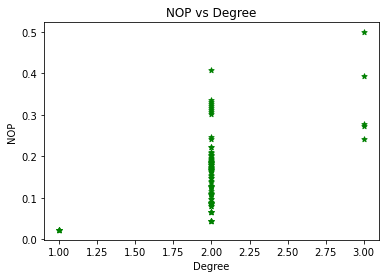

In [ ]:
plt.scatter(degree_list, NOP_list, label= "stars", color= "green", marker= "*", s=30)

plt.xlabel('Degree')

plt.ylabel('NOP')
# plot title
plt.title('NOP vs Degree')
# showing legend
#plt.legend()
 
# function to show the plot
#plt.show()

plt.savefig("NOP vs degree Kolkata", facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=False)